In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.exposure import rescale_intensity

## Lab 2
### Filters

#### Mean filter

In [2]:
def get_mean_kernel(kernel_size=5):
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32)
    return kernel / kernel.sum()

#### Gaussian filter

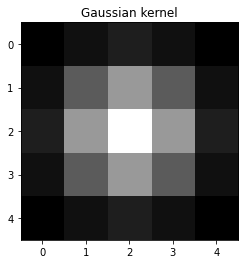

In [3]:
def get_gaussian_kernel(kernel_size=5, sigma=1):
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    mid = kernel_size // 2
    for x in range(-mid, mid+1):
        for y in range(-mid, mid+1):
            kernel[x+mid, y+mid] = (1 / (2 * np.pi * sigma**2)) * np.exp(- (x**2 + y**2) / (2 * sigma**2))
    return kernel

plt.imshow(get_gaussian_kernel(), 'gray')
plt.title('Gaussian kernel')
plt.show()

#### Laplacian filter

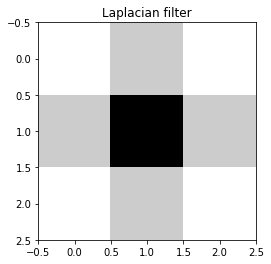

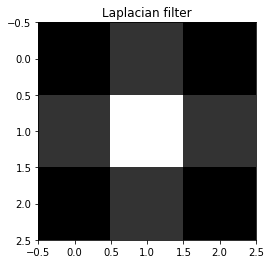

In [4]:
kernel_laplacian_neg = np.array([
    [1,  0, 1],
    [0, -4, 0],
    [1,  0, 1]
])

plt.imshow(kernel_laplacian_neg, 'gray')
plt.title('Laplacian filter')
plt.show()

kernel_laplacian_pos = np.array([
    [-1, 0, -1],
    [ 0, 4,  0],
    [-1, 0, -1]
])

plt.imshow(kernel_laplacian_pos, 'gray')
plt.title('Laplacian filter')
plt.show()

#### Sobel filter

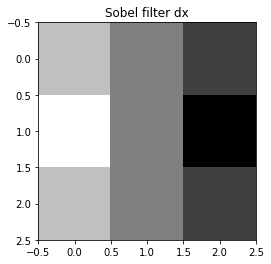

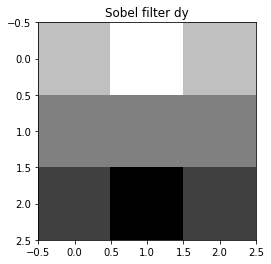

In [5]:
kernel_sobel_x = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

plt.imshow(kernel_sobel_x, 'gray')
plt.title('Sobel filter dx')
plt.show()

kernel_sobel_y = np.array([
    [ 1,  2,  1],
    [ 0,  0,  0],
    [-1, -2, -1]
])

plt.imshow(kernel_sobel_y, 'gray')
plt.title('Sobel filter dy')
plt.show()

#### Prewitt filter

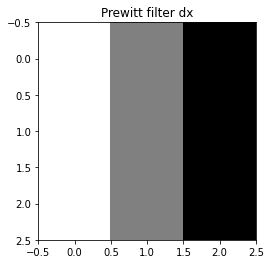

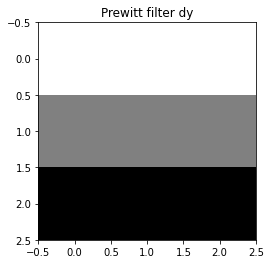

In [6]:
kernel_prewitt_x = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

plt.imshow(kernel_prewitt_x, 'gray')
plt.title('Prewitt filter dx')
plt.show()

kernel_prewitt_y = np.array([
    [ 1,  1,  1],
    [ 0,  0,  0],
    [-1, -1, -1]
])

plt.imshow(kernel_prewitt_y, 'gray')
plt.title('Prewitt filter dy')
plt.show()

#### Scharr filter

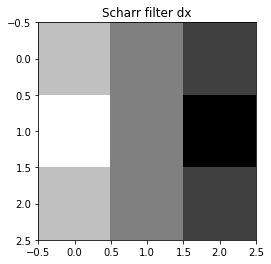

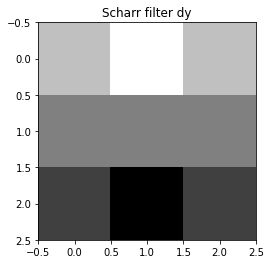

In [7]:
kernel_scharr_x = np.array([
    [ 3, 0,  -3],
    [10, 0, -10],
    [ 3, 0,  -3]
])

plt.imshow(kernel_sobel_x, 'gray')
plt.title('Scharr filter dx')
plt.show()

kernel_scharr_y = np.array([
    [ 3, 10,  3],
    [ 0,  0,  0],
    [-3,-10, -3]
])

plt.imshow(kernel_sobel_y, 'gray')
plt.title('Scharr filter dy')
plt.show()

#### Robert filter

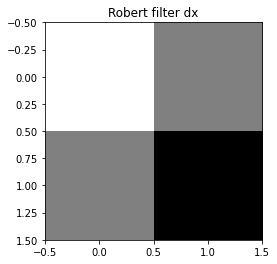

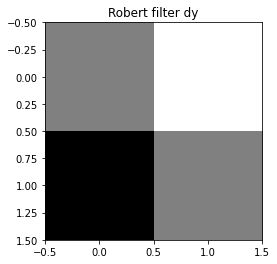

In [8]:
kernel_robert_x = np.array([
    [1,  0],
    [0, -1],
])

plt.imshow(kernel_robert_x, 'gray')
plt.title('Robert filter dx')
plt.show()

kernel_robert_y = np.array([
    [ 0, 1],
    [-1, 0],
])

plt.imshow(kernel_robert_y, 'gray')
plt.title('Robert filter dy')
plt.show()

### Convolution

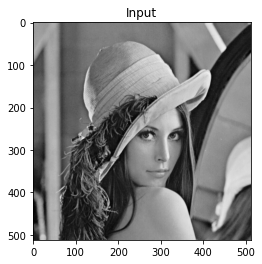

In [9]:
img = cv2.imread('./lena.png', 0)
img_h, img_w = img.shape

plt.imshow(img, 'gray')
plt.title('Input')
plt.show()

In [10]:
kernel = kernel_laplacian_pos
kernel_size = len(kernel)

n = (kernel_size - 1) // 2
input_ = cv2.copyMakeBorder(img, n, n, n, n, cv2.BORDER_REPLICATE)
output = np.zeros((img_h, img_w), dtype=np.float32)

for x in range(img_h):
    for y in range(img_w):
        sum_ = 0
        for i in range(kernel_size):
            for j in range(kernel_size):
                sum_ += kernel[i, j] * input_[x-n-i, y-n-j]
        output[x, y] = sum_

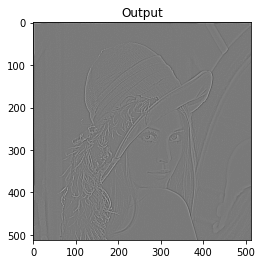

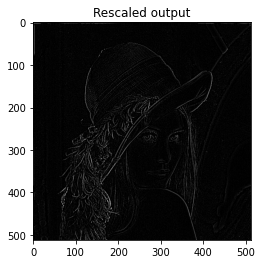

In [11]:
plt.imshow(output, 'gray')
plt.title('Output')
plt.show()

plt.imshow(rescale_intensity(output, (0, 255)), 'gray')
plt.title('Rescaled output')
plt.show()

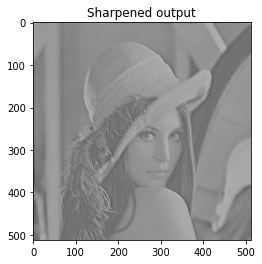

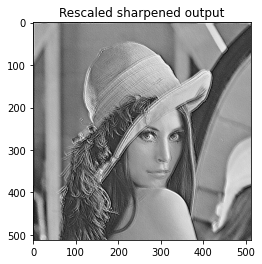

In [12]:
plt.imshow(img + output, 'gray')
plt.title('Sharpened output')
plt.show()

plt.imshow(rescale_intensity(img + output, (0, 255)), 'gray')
plt.title('Rescaled sharpened output')
plt.show()

## Lab 3
**Erlang distribution**

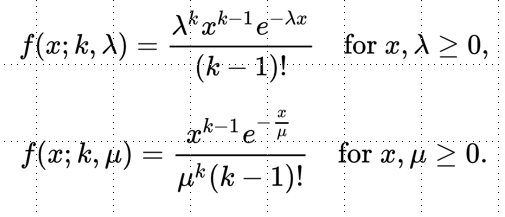

In [27]:
def erlang_dist(x, k, l):
    return ((l ** k) * (x ** (k-1)) * (math.e ** -(l * x))) / (math.factorial(k-1))

## Lab 4
**Motion Deblur**

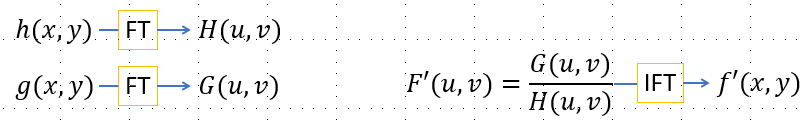

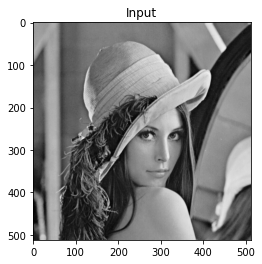

In [13]:
img = cv2.imread('./lena.png', 0)
img_h, img_w = img.shape

plt.imshow(img, 'gray')
plt.title('Input')
plt.show()

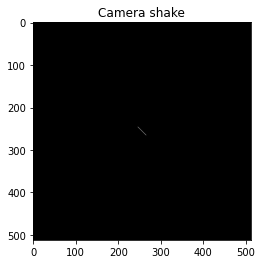

In [21]:
size = 20
h = np.zeros((size, size), dtype=np.float32)

for i in range(size):
    for j in range(size):
        if i == j:
            h[i, j] = 1

h = h / h.sum()

# Camera shake
h = cv2.copyMakeBorder(h, (img_h-size)//2, (img_h-size)//2, (img_w-size)//2, (img_w-size)//2, cv2.BORDER_CONSTANT, value=0)

plt.imshow(h, 'gray')
plt.title('Camera shake')
plt.show()

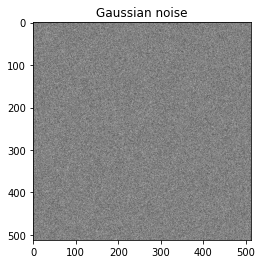

In [22]:
# Noise
n = np.random.normal(0, 1, (img_h, img_w))

plt.imshow(n, 'gray')
plt.title('Gaussian noise')
plt.show()

In [23]:
F = np.fft.fft2(img)
H = np.fft.fft2(h)
N = np.fft.fft2(n)

F_shift = np.fft.fftshift(F)
H_shift = np.fft.fftshift(H)
N_shift = np.fft.fftshift(N)

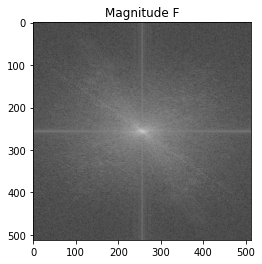

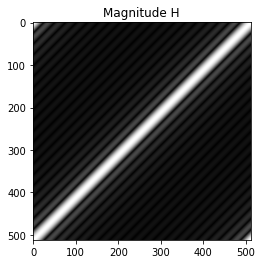

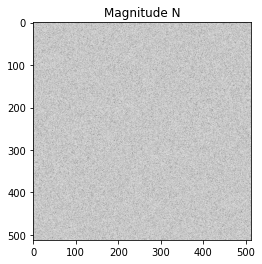

In [24]:
plt.imshow(np.log1p(np.abs(F_shift)), cmap='gray')
plt.title('Magnitude F')
plt.show()

plt.imshow(np.log1p(np.abs(H_shift)), cmap='gray')
plt.title('Magnitude H')
plt.show()

plt.imshow(np.log1p(np.abs(N_shift)), cmap='gray')
plt.title('Magnitude N')
plt.show()

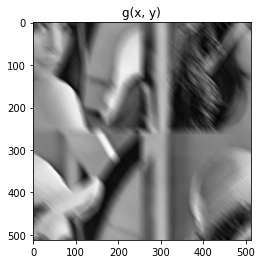

In [25]:
G_shift = F_shift * H_shift

G = np.fft.ifftshift(G_shift)
g = np.fft.ifft2(G).real

plt.imshow(g, 'gray')
plt.title('g(x, y)')
plt.show()

C:\Users\farha\AppData\Local\Temp\ipykernel_3656\1049776592.py:1: RuntimeWarning: invalid value encountered in true_divide
  F_hat_shift = G_shift / H_shift


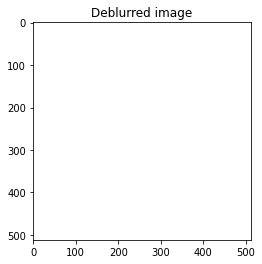

In [26]:
F_hat_shift = G_shift / H_shift

F_hat = np.fft.ifftshift(F_hat_shift)
f_hat = np.fft.ifft2(F_hat).real

plt.imshow(f_hat, 'gray')
plt.title('Deblurred image')
plt.show()

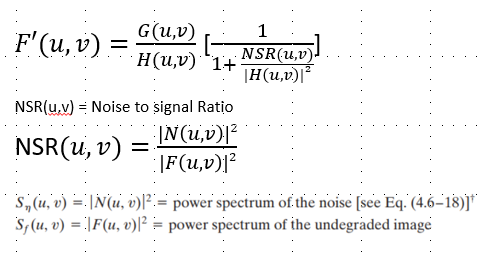

C:\Users\farha\AppData\Local\Temp\ipykernel_3656\2567220304.py:2: RuntimeWarning: invalid value encountered in true_divide
  F_hat_shift = (G_shift / H_shift) * (1 / (1 + (0.0000003 / np.abs(H_shift)**2)))
C:\Users\farha\AppData\Local\Temp\ipykernel_3656\2567220304.py:2: RuntimeWarning: divide by zero encountered in true_divide
  F_hat_shift = (G_shift / H_shift) * (1 / (1 + (0.0000003 / np.abs(H_shift)**2)))


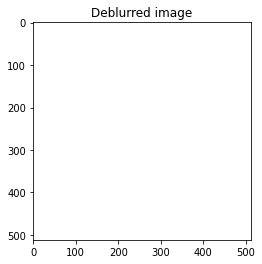

In [20]:
# Wiener filter
F_hat_shift = (G_shift / H_shift) * (1 / (1 + (0.0000003 / np.abs(H_shift)**2)))

F_hat = np.fft.ifftshift(F_hat_shift)
f_hat = np.fft.ifft2(F_hat).real

plt.imshow(f_hat, 'gray')
plt.title('Deblurred image')
plt.show()